<a href="https://colab.research.google.com/github/AlexandreKc/EV1_ML_CRISPDM/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

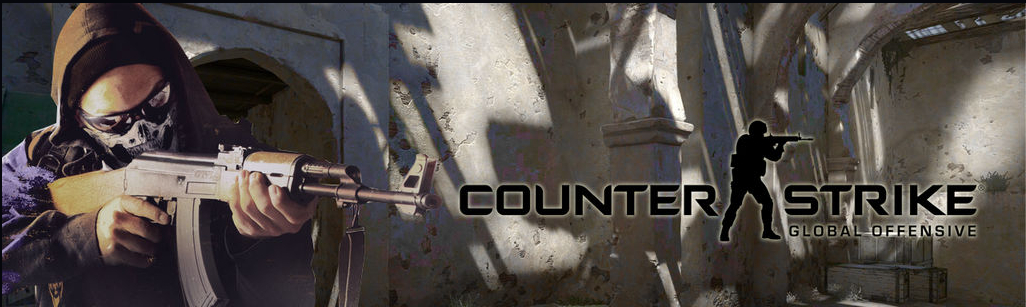

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Sebastián Carrera
* Yasna Villarroel
* Kevin Vivanco

Docente: Giocrisrai Godoy

Sección: MLY0100 - 003V

#### Este informe presenta un análisis exhaustivo de los datos de partidas de Counter-Strike: Global Offensive (CS:GO), con el objetivo de proporcionar información valiosa y modelos predictivos para la empresa Valve.
#### El análisis se estructura siguiendo la metodología CRISP-DM, abarcando las fases de Entendimiento del Negocio, Comprensión de los Datos y Preparación de los Datos.

---
## Fase 1: Business Understanding
---

## **1.1 CONTEXTO DE NEGOCIO**
### **1.1.1 Descripción del Juego**

*   Valve, una empresa líder en la industria de los videojuegos, ha contactado a nuestro equipo de análisis de datos y modelado de Machine Learning para analizar y desarrollar modelos predictivos basados en datos de partidas de Counter-Strike: Global Offensive (CS:GO).
*   CS:GO es un juego de disparos en primera persona (FPS) táctico y competitivo, donde dos equipos de cinco jugadores se enfrentan. Estos equipos se denominan Terroristas (T) y Contra-Terroristas (CT).
*   En cada ronda, los equipos tienen objetivos distintos:
#####🔹 **Terroristas (T):** El principal objetivo de los Terroristas es plantar una bomba (denominada "C4") en uno de los dos sitios de bomba designados dentro del mapa. Una vez plantada, la bomba tiene un temporizador de 45 segundos antes de explotar.
#####🔹 **Contra-Terroristas (CT):** El objetivo de los Contra-Terroristas es evitar que los Terroristas planten la bomba. Si la bomba es plantada, los CT deben desactivarla antes de que explote. También pueden ganar la ronda eliminando a todos los jugadores Terroristas.
*   El juego se caracteriza por su economía, donde los jugadores ganan dinero en el juego por acciones como eliminar enemigos, ganar rondas o plantar/desactivar la bomba. Este dinero se utiliza para comprar armas, armaduras y equipamiento al comienzo de cada ronda. Las decisiones sobre qué comprar y cuándo pueden ser cruciales para el éxito.
*   Las partidas se dividen en rondas, y el primer equipo en alcanzar un número determinado de rondas ganadas gana la partida. Los equipos cambian de bando (T a CT o viceversa) a la mitad de la partida.

### **1.1.2 Cliente**
*   Valve Corporation
*   Valve es el desarrollador y distribuidor de CS:GO, así como el operador de la plataforma de distribución digital de videojuegos Steam.
*   Valve busca utilizar el análisis de datos y el modelado de Machine Learning para obtener información valiosa sobre el juego, lo que les permite tomar decisiones informadas sobre:
#####🔹 El equilibrio del juego
#####🔹 El diseño de mapas
#####🔹 El desarrollo de nuevas características
#####🔹 La experiencia del jugador en general

### **1.1.3 Datos Disponibles**
*   Los datos que se proporcionarán para el análisis corresponden a un conjunto de más de 7000 partidas de CS:GO. Cada partida involucra un máximo de 10 jugadores (5 por equipo).
*   La información se ha extraído de archivos de repetición (replays) de CS:GO. Los replays son archivos propietarios que contienen un registro detallado de cada acción realizada por cada jugador durante una partida. Esto incluye movimientos, disparos, compras, uso de equipamiento, etc.
*   Los replays han sido procesados y extraídos utilizando un "scrapper" (una herramienta que automatiza la extracción de datos) y luego preprocesados utilizando un script para limpiar y estructurar los datos.
*   El conjunto de datos final se presenta en formato CSV (Comma Separated Value), que es un formato tabular común para el almacenamiento y análisis de datos.
*   El dataset contiene 79.157 filas, donde cada fila corresponde a las acciones y el rendimiento de un jugador individual dentro de una ronda específica de una partida.
*   El dataset incluye 29 columnas que representan diversas variables que describen las acciones, el rendimiento y el contexto de cada jugador dentro del juego. Estas variables incluyen:
#####🔹**Información de la partida y la ronda** (e.g., Map, MatchId, RoundId)
#####🔹 **Información del equipo** (e.g., Team, InternalTeamId)
#####🔹 **Rendimiento del jugador** (e.g., Kills, Assists, Headshots, TimeAlive, TravelledDistance)
#####🔹 **Equipamiento** (e.g., RoundStartingEquipmentValue, TeamStartingEquipmentValue, PrimaryXXXX)
#####🔹 **Resultados** (e.g., RoundWinner, MatchWinner, Survived)
#####🔹 **Acciones** (e.g., RLethalGrenadesThrown, RNonLethalGrenadesThrown, FlankKills)

*   **Contexto:** El dataset proporciona una visión completa y detallada de las acciones de los jugadores en las partidas de CS:GO, lo que permite analizar diversos aspectos del juego, como el rendimiento individual, las estrategias de equipo y los factores que influyen en el resultado de las partidas.

$$
\boxed{
\begin{array}{|l|l|}
\hline
\textbf{Dato} & \textbf{Descripción} \\
\hline
\text{Map} & \text{Nombre del Mapa donde se jugó la partida} \\
\hline
\text{Team} & \text{Nombre de equipo al que pertenece el jugador} \\
\hline
\text{InternalTeamId} & \text{Identificador del equipo al que pertenece el jugador} \\
\hline
\text{MatchId} & \text{Identificador de la partida} \\
\hline
\text{RoundId} & \text{Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline
\text{MatchWinner} & \text{Indica si el jugador ganó o no la partida} \\
\hline
\text{RoundWinner} & \text{Indica si el jugador ganó o no la ronda analizada.} \\
\hline
\text{Survived} & \text{ Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar)} \\
\hline
\text{AbnormalMatch} & \text{Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline
\text{TimeAlive} & \text{Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline
\text{TravelledDistance} & \text{Distancia viajada por el jugador durante la partida.} \\
\hline
\text{RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text{Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline
\text{PrimaryXXXX} & \text{Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline
\text{[Match Round] Assists} & \text{Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline
\text{[Match|Round] Kills} & \text{Cantidad de kills efectuados por el jugador durante la partida o la ronda} \\
\hline
\text{[Match|Round] FlankKills} & \text{Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline
\text{[Match|Round] HeadShots} & \text{Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline
\text{RoundStartingEquipmentValue} & \text{Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline
\text{TeamStartingEquipmentValue} & \text{Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\hline
\end{array}
}
$$

## **1.2 OBJETIVOS DEL NEGOCIO**

*   Problema: El problema central que se abordará en este proyecto es comprender los factores que determinan el éxito de un equipo en CS:GO. Esto implica analizar la influencia de las diversas variables disponibles en el dataset para identificar patrones y relaciones que puedan explicar por qué algunos equipos ganan más partidas que otros.

*   Público objetivo: Los resultados de este análisis pueden ser de interés de jugadores que puedan estar atraidos por mejorar su desempeño, equipos profesionales, entrenadores y casas de apuesta.

*   Valve, como cliente principal, puede tener objetivos más específicos relacionados con el desarrollo del juego y la mejora de la experiencia del jugador.
*   Estos objetivos pueden incluir:
#####🔹  **Balance del juego:** Analizar si ciertas armas, mapas o estrategias proporcionan una ventaja injusta a un equipo.
#####🔹 **Diseño de mapas:** Comprender cómo los jugadores se mueven y utilizan los mapas para informar el diseño de futuros mapas.
#####🔹  **Emparejamiento de jugadores:** Mejorar el sistema de emparejamiento para crear partidas más equilibradas y competitivas.
#####🔹  **Detección de trampas:** Identificar patrones de juego que puedan indicar el uso de trampas.


## **1.3 OBJETIVOS DE DATA MINING**
### **1.3.1 Clasificación: Predecir si el jugador sobrevivirá la ronda**
Descripción:
* Desarrollar un modelo de clasificación que, utilizando variables del desempeño del jugador y el contexto de la ronda, prediga si un jugador sobrevivirá o no la ronda.

Variables relevantes:
#####🔹  **RoundKills:** Cantidad de enemigos eliminados por el jugador en la ronda.
#####🔹  **RoundHeadshots:** Cantidad de tiros a la cabeza realizados por el jugador en la ronda.
#####🔹  **RoundStartingEquipmentValue:** Valor del equipamiento del jugador al inicio de la ronda.

Hipótesis:
* "*La probabilidad de que un jugador sobreviva una ronda depende del valor de su equipamiento inicial y de su capacidad para eliminar enemigos durante la ronda.*"


---

### **1.3.2 Regresión: Influencia del Equipamiento Inicial en el Desempeño del Jugador**

Descripción:
* Desarrollar un modelo de regresión que analice cómo el valor del equipamiento inicial de un jugador impacta en su desempeño durante una partida, medido a través de variables como la cantidad de eliminaciones (kills), precisión en disparos a la cabeza (headshots) y eliminaciones por flanqueo (flank kills).

Variables relevantes:
* Valor de Equipamiento Inicial:
#####🔹  **RoundStartingEquipmentValue:** Principal variable predictora.

* Medidas de desempeño:
#####🔹  **MatchKills:** Número total de enemigos eliminados en la partida.
#####🔹  **MatchHeadshots:** Número total de disparos a la cabeza.
#####🔹  **MatchFlankKills:** Número total de eliminaciones al flanquear al oponente.

* Contexto adicional:
#####🔹  **Survived:** Sobrevivencia en la ronda.
#####🔹  **RoundWinner:** Resultado de la ronda.

Hipótesis:
* "*Un mayor valor de equipamiento inicial mejora el desempeño del jugador en la partida, aumentando la cantidad de eliminaciones, la precisión en disparos a la cabeza y las oportunidades de flanqueo exitoso.*"

---
## Fase 2: Data Understanding
---

# 2.1 Análisis Exploratorio de Datos (EDA)

## **2.1.1 Carga de Librerías**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm


## **2.1.2 Carga de Archivos**

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (2).csv


<ipython-input-3-f0e2594db642>:5: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";")


## **2.1.3 Exploración Inicial de Datos**

In [ ]:
#Exploración inicial de las primeras 5 filas del dataset.
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [ ]:
#Exploración de las últimas 5 filas del dataset.
df.tail()

NameError: name 'df' is not defined

In [ ]:
# Información de las filas y columnas del dataset.
# Si es que hay valores nulos y los tipos de datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  int64  
 11  TravelledDistance            79157 non-null  float64
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [ ]:
# Para saber cuántas filas y columnas hay en el dataset.
print ('Los datos tienen {0} filas y {1} columnas'.format(df.shape[0],df.shape[1]))

Los datos tienen 79157 filas y 30 columnas


## **2.1.4 Valores Nulos**

In [ ]:
# Calcula la cantidad de valores nulos
null_values = df.isnull().sum()

#Filtra los valores
null_values = null_values[null_values > 0]

print (null_values)

Team           2
MatchWinner    1
dtype: int64


In [ ]:
# Aquí se obtiene el porcentaje de valores nulos de las columnas y los almacena en la variable "miss".

miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

,0
MatchWinner,0.000013
Team,0.000025


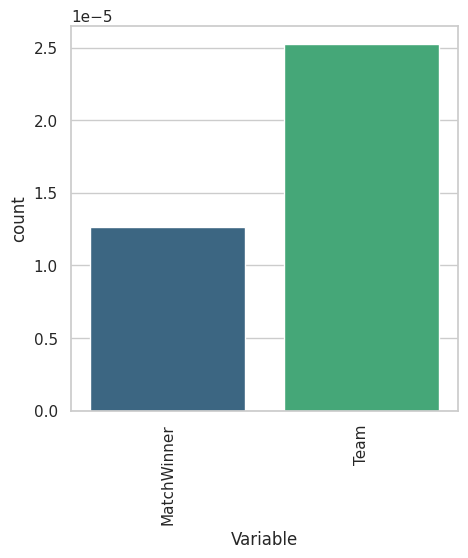

In [ ]:
# Se puede visualizar que las variables MatchWinner y Team, tienen un porcentaje bajo de valores nulos.
# Ahora se representará en un gráfico de barras.
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Nombre']
miss['Variable'] = miss.index
# Ajustar el tamaño del gráfico
plt.figure(figsize=(5, 5))  # Ancho: 5 pulgadas, Alto: 5 pulgadas

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Variable', y='count', hue='Variable', palette='viridis', legend=False, data=miss)
plt.xticks(rotation = 90)
plt.show()

## **2.1.5 Exploración de Valores**

In [ ]:
# Para saber cuales son los valores únicos de cada columna

# Se itera a través de cada columna del DataFrame
for col in df.columns:
    # Obtiene todos los valores únicos de la columna actual
    unique_values = df[col].unique()

    # Comprueba el número de valores únicos de la columna actual
    if len(unique_values) > 50:
        # Si hay demasiados valores únicos, muestrear los 50 primeros
        top_occurring_values = df[col].value_counts().head(50).index.tolist()
        print(f"Column '{col}': {len(unique_values)} unique values. Top 50 values: {top_occurring_values}")
    else:
        # En caso contrario, imprimir todos los valores únicos
        print(f"Column '{col}': {len(unique_values)} unique values. All values: {unique_values}")

Column 'Unnamed: 0': 79157 unique values. Top 50 values: [123779, 600, 601, 602, 603, 123763, 123762, 123761, 123760, 123759, 123758, 123757, 123756, 123755, 123754, 123753, 123752, 123751, 123750, 123749, 123748, 636, 635, 634, 633, 632, 631, 630, 629, 628, 627, 626, 625, 624, 623, 622, 621, 652, 651, 650, 649, 648, 647, 646, 645, 644, 643, 642, 641, 640]
Column 'Map': 4 unique values. All values: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']
Column 'Team': 3 unique values. All values: ['Terrorist' 'CounterTerrorist' nan]
Column 'InternalTeamId': 2 unique values. All values: [1 2]
Column 'MatchId': 333 unique values. Top 50 values: [29, 113, 40, 451, 80, 434, 423, 510, 106, 115, 50, 213, 297, 278, 323, 237, 342, 229, 255, 431, 372, 338, 387, 39, 392, 385, 139, 180, 473, 477, 490, 83, 79, 73, 482, 239, 504, 314, 308, 319, 317, 207, 370, 161, 167, 212, 326, 151, 228, 265]
Column 'RoundId': 36 unique values. All values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22

* Aquí se puede visualizar que las variables MatchWinner y RoundWinner que son de tipo Object, tienen valores que conceptualmente deberían ser Booleanos **['True', 'False'].**
* Y la variable RoundWinner tiene una inconsistencia en los datos, ya que estos son los valores que retorna: **['False' 'True' 'False4' True False]**
* La variable TimeALive se puede ver que no está en segundos, ya que son demasiado grandes los números.
* La variable AbnormalMatch es inútil, ya que todos sus valores son **'False'**.

In [ ]:
# Analisis de los valores de la Variable MatchWinner
unique_values = df['MatchWinner'].unique()
print("MatchWinner",unique_values)

# Analisis de los valores de la Variable RoundWinner
unique_values = df['RoundWinner'].unique()
print("RoundWinner",unique_values)

# Analisis de los valores de la Variable AbnormalMatch
unique_values = df['AbnormalMatch'].unique()
print("AbnormalMatch",unique_values)

MatchWinner [True False nan]
RoundWinner ['False' 'True' 'False4' True False]
AbnormalMatch [False]


## **2.1.6 OBJETIVO CLASIFICACIÓN: Predecir si el jugador sobrevivirá la ronda**#

In [ ]:
# Revisar valores nulos en las variables
missing_data = df[['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue']].isnull().sum()
# Mostrar la cantidad de valores nulos
print("Cantidad de valores nulos en las variables :")
print(missing_data)
# También podemos ver el porcentaje de datos faltantes
missing_percentage = (missing_data / len(df)) * 100
print("\nPorcentaje de valores nulos en las variables :")
print(missing_percentage)

Cantidad de valores nulos en las variables :
RoundKills                     0
RoundHeadshots                 0
RoundStartingEquipmentValue    0
dtype: int64

Porcentaje de valores nulos en las variables :
RoundKills                     0.0
RoundHeadshots                 0.0
RoundStartingEquipmentValue    0.0
dtype: float64


Matriz de correlación:
                             RoundKills  RoundHeadshots  \
RoundKills                     1.000000        0.679179   
RoundHeadshots                 0.679179        1.000000   
RoundStartingEquipmentValue    0.172141        0.035972   
Survived                       0.331619        0.205279   

                             RoundStartingEquipmentValue  Survived  
RoundKills                                      0.172141  0.331619  
RoundHeadshots                                  0.035972  0.205279  
RoundStartingEquipmentValue                     1.000000  0.170578  
Survived                                        0.170578  1.000000  


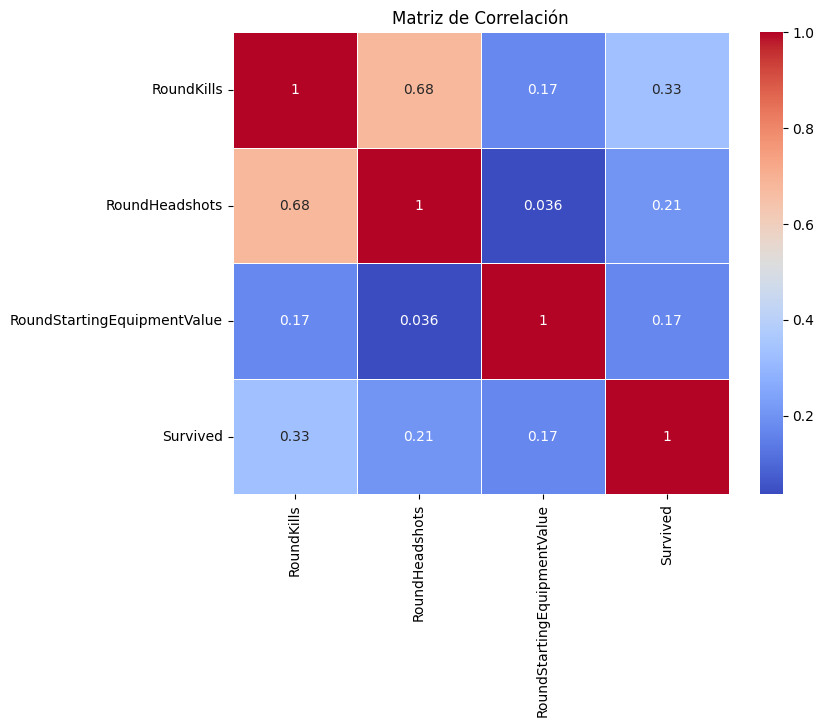

In [ ]:
# Calcular la matriz de correlación de las variables numéricas relevantes
correlation_matrix = df[['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'Survived']].corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

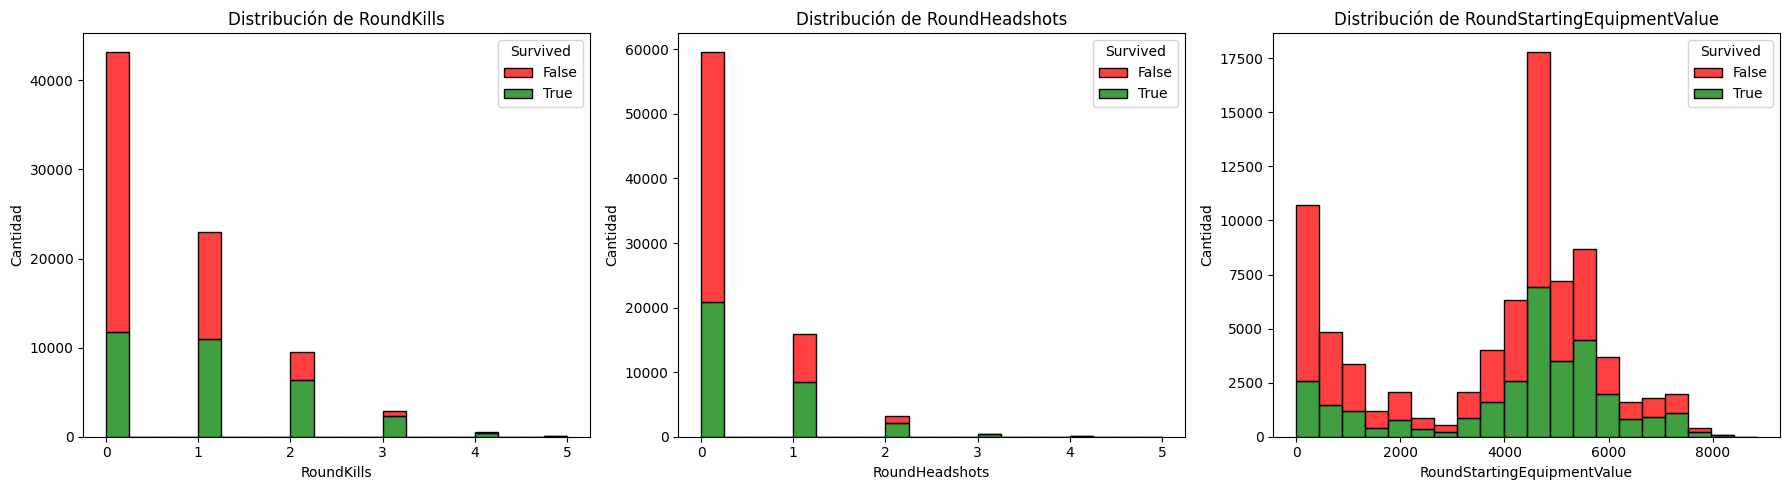

In [17]:
variables = ['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue']

plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=var, hue='Survived', multiple='stack', palette={False: 'red', True: 'green'}, bins=20)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

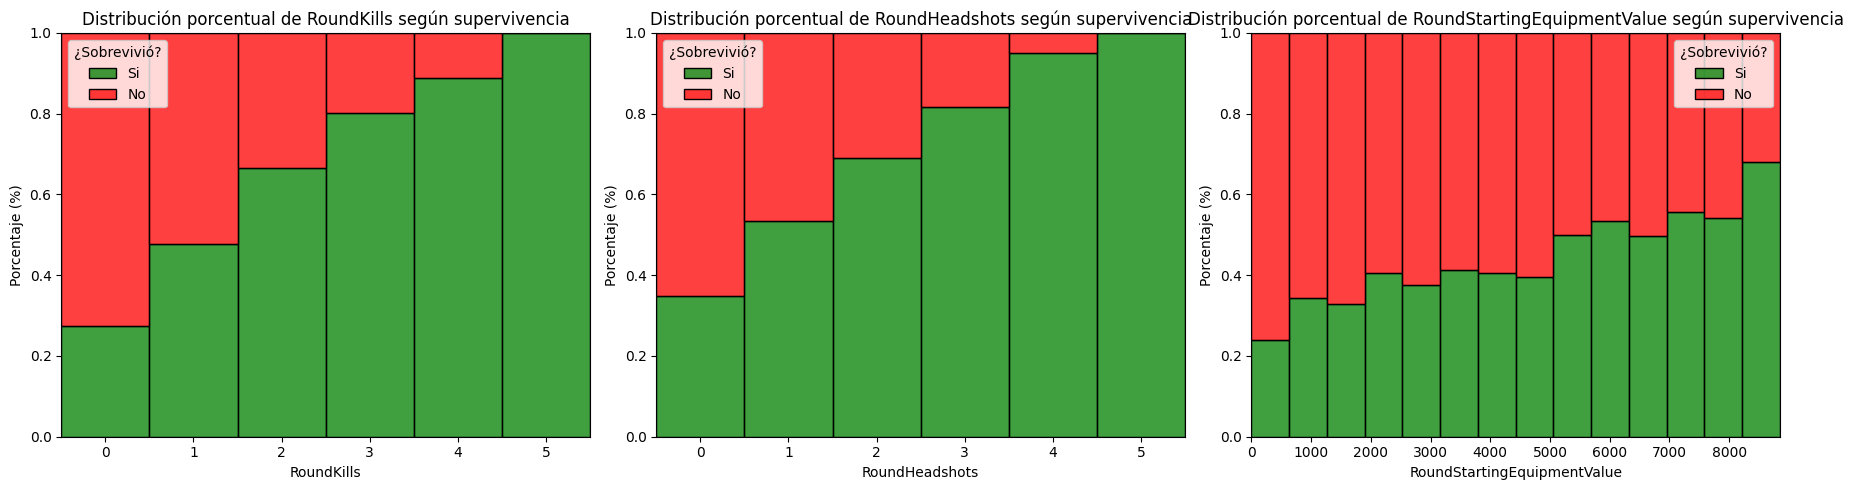

In [18]:
variables = ['RoundKills', 'RoundHeadshots', 'RoundStartingEquipmentValue']

plt.figure(figsize=(18, 5))

for i, var in enumerate(variables):
    plt.subplot(1, 3, i+1)

    # Definir los bins manualmente para que podamos controlar después
    if var == 'RoundStartingEquipmentValue':
        bins = np.linspace(df[var].min(), df[var].max(), 15)
    else:
        bins = np.arange(df[var].min(), df[var].max() + 2) - 0.5  # Para valores discretos como kills

    # Plot
    sns.histplot(
        data=df,
        x=var,
        hue='Survived',
        multiple='fill',    # MUY IMPORTANTE: fill para ver proporciones
        palette={False: 'red', True: 'green'},
        bins=bins,
        stat='percent'
    )

    plt.title(f'Distribución porcentual de {var} según supervivencia')
    plt.xlabel(var)
    plt.ylabel('Porcentaje (%)')
    plt.legend(title='¿Sobrevivió?', labels=['Si', 'No'])

plt.tight_layout()
plt.show()


---

#DISTRIBUCIONES

# 1. Distribución de RoundStartingEquipmentValue
## Histograma General

* Ver cómo se distribuye el valor del equipamiento inicial en toda la base de datos.

* Saber si es normal, asimétrica, concentrada en ciertos valores, etc.

* Importante porque el valor inicial puede estar sesgado (por ejemplo, si muchos jugadores empiezan pobres).

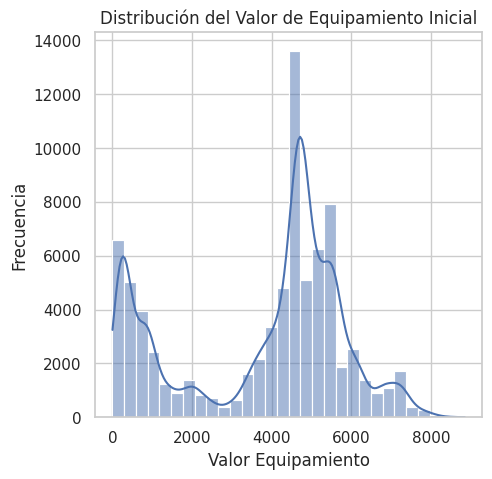

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(df['RoundStartingEquipmentValue'], kde=True, bins=30)
plt.title('Distribución del Valor de Equipamiento Inicial')
plt.xlabel('Valor Equipamiento')
plt.ylabel('Frecuencia')
plt.show()

## Histograma separado por sobrevivencia (Survived):

* Ver si los sobrevivientes tenían equipamiento diferente.

* Confirmar visualmente si hay relación entre equipamiento inicial y sobrevivir.

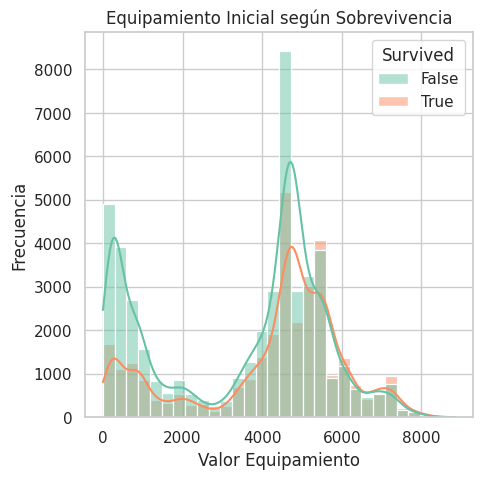

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(data=df, x='RoundStartingEquipmentValue', hue='Survived', kde=True, bins=30, palette='Set2')
plt.title('Equipamiento Inicial según Sobrevivencia')
plt.xlabel('Valor Equipamiento')
plt.ylabel('Frecuencia')
plt.show()

## 2. Distribución de RoundKills y RoundHeadshots

### RoundKills
* Ver cuántos enemigos elimina un jugador en una sola ronda.

* Te da idea de si es normal que un jugador consiga muchas kills o más bien pocas por ronda.

### RoundHeadshots
* Ver la precisión del jugador (headshots suelen ser más difíciles que kills normales).

* Relacionarlo luego con el desempeño y la probabilidad de sobrevivir.

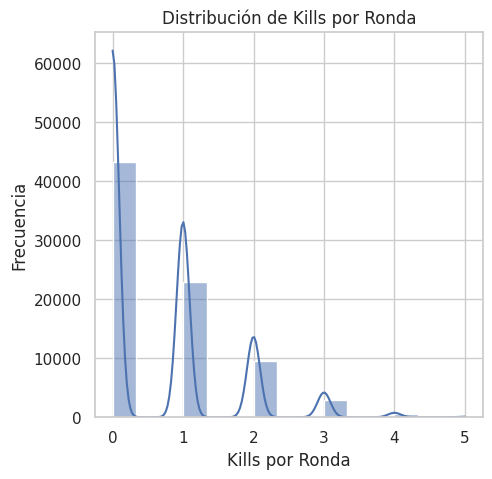

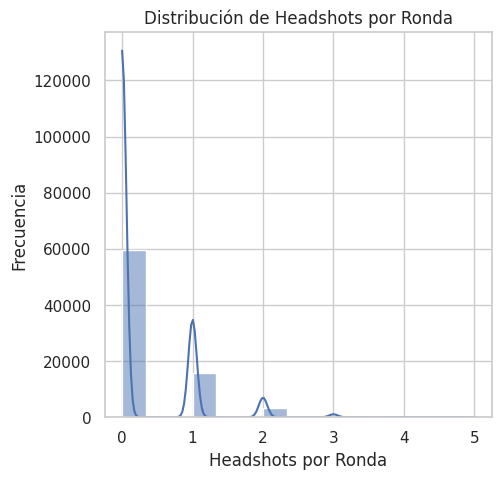

In [ ]:
# RoundKills
plt.figure(figsize=(5,5))
sns.histplot(df['RoundKills'], kde=True, bins=15)
plt.title('Distribución de Kills por Ronda')
plt.xlabel('Kills por Ronda')
plt.ylabel('Frecuencia')
plt.show()

# RoundHeadshots
plt.figure(figsize=(5,5))
sns.histplot(df['RoundHeadshots'], kde=True, bins=15)
plt.title('Distribución de Headshots por Ronda')
plt.xlabel('Headshots por Ronda')
plt.ylabel('Frecuencia')
plt.show()


# 3. Distribución de kills en la partida (MatchKills, MatchHeadShots, MatchFlankKills)

### Kills en la partida (MatchKills)
* Saber cuántos enemigos mata un jugador en total en una partida completa.

* Para el modelo de regresión: un jugador que mata mucho podría estar relacionado con tener mejor equipamiento.

### Headshots en la partida (MatchHeadShots)
* Mismo propósito que el anterior pero enfocado en precisión:
ver si los jugadores más letales también tienen mejor puntería.

### FlankKills en la partida (MatchFlankKills)
* Ver la capacidad táctica del jugador (matar por la espalda o desde ángulos estratégicos).

* Estos kills a veces implican mejor conocimiento del mapa y podrían relacionarse también con sobrevivencia o desempeño.

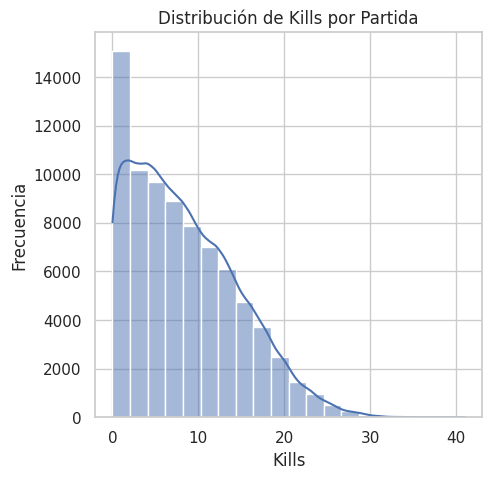

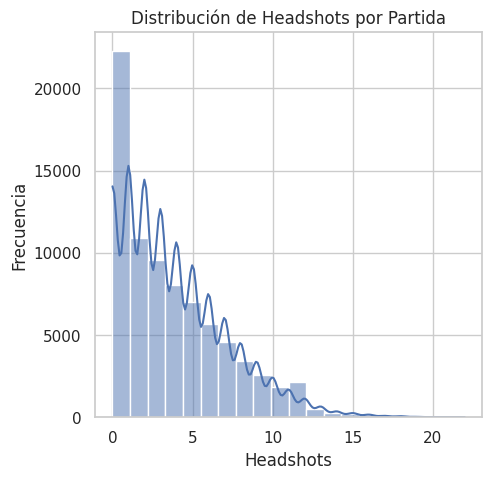

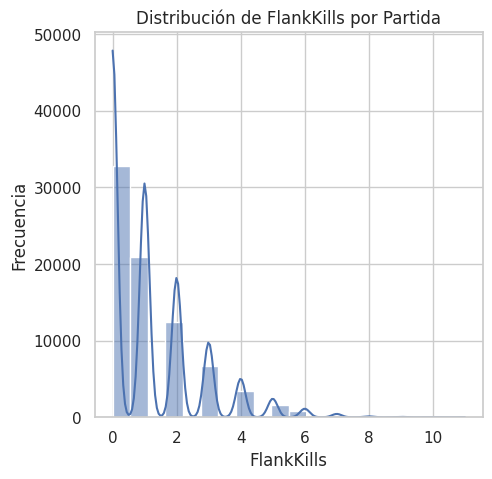

In [ ]:
# Kills en la partida
plt.figure(figsize=(5,5))
sns.histplot(df['MatchKills'], kde=True, bins=20)
plt.title('Distribución de Kills por Partida')
plt.xlabel('Kills')
plt.ylabel('Frecuencia')
plt.show()

# Headshots en la partida
plt.figure(figsize=(5,5))
sns.histplot(df['MatchHeadshots'], kde=True, bins=20)
plt.title('Distribución de Headshots por Partida')
plt.xlabel('Headshots')
plt.ylabel('Frecuencia')
plt.show()

# FlankKills en la partida
plt.figure(figsize=(5,5))
sns.histplot(df['MatchFlankKills'], kde=True, bins=20)
plt.title('Distribución de FlankKills por Partida')
plt.xlabel('FlankKills')
plt.ylabel('Frecuencia')
plt.show()


---
## Fase 3: Data Preparation
---

Limpieza y trasnformación de los datos

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.